In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
data=pd.read_excel('Strikers_performance.xlsx')
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


In [9]:
missing_values=data.isnull().sum()
print('Missing Values:', missing_values)

Missing Values: Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64


In [4]:
from sklearn.impute import SimpleImputer

In [5]:
imputer =SimpleImputer(strategy='median')
imputer.fit(data[['Movement off the Ball']])
data[['Movement off the Ball']]=imputer.transform(data[['Movement off the Ball']])

In [6]:
imputer =SimpleImputer(strategy='median')
imputer.fit(data[['Big Game Performance']])
data[['Big Game Performance']]=imputer.transform(data[['Big Game Performance']])

In [7]:
imputer =SimpleImputer(strategy='median')
imputer.fit(data[['Penalty Success Rate']])
data[['Penalty Success Rate']]=imputer.transform(data[['Penalty Success Rate']])

In [8]:
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

In [86]:
data['Goals Scored']=data['Goals Scored'].astype('int64')
data['Assists']=data['Assists'].astype('int64')
data['Shots on Target']=data['Shots on Target'].astype('int64')
data['Movement off the Ball']=data['Movement off the Ball'].astype('int64')
data['Hold-up Play']=data['Hold-up Play'].astype('int64')
data['Aerial Duels Won']=data['Aerial Duels Won'].astype('int64')
data['Defensive Contribution']=data['Defensive Contribution'].astype('int64')
data['Big Game Performance']=data['Big Game Performance'].astype('int64')
data['Impact on Team Performance']=data['Impact on Team Performance'].astype('int64')
data['Off-field Conduct']=data['Off-field Conduct'].astype('int64')

In [87]:
round(data.describe(),2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


In [11]:
freq_footedness=data['Footedness'].value_counts()
freq_footedness

Footedness
Right-footed    267
Left-footed     233
Name: count, dtype: int64

In [12]:
perc_footedness=freq_footedness/500*100
perc_footedness

Footedness
Right-footed    53.4
Left-footed     46.6
Name: count, dtype: float64

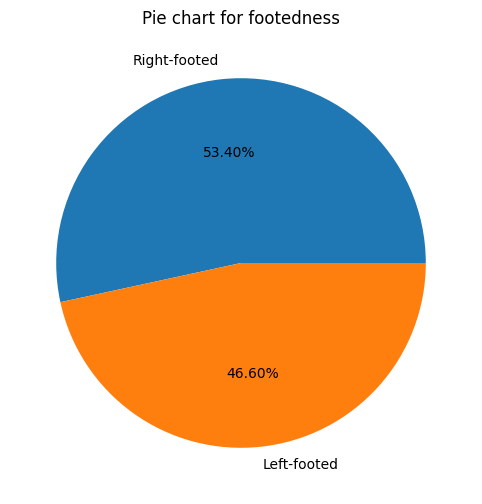

In [14]:
plt.figure(figsize=(10,6))
perc_footedness.plot(kind='pie', autopct='%1.2f%%')
plt.title('Pie chart for footedness')
plt.ylabel('')
plt.show()

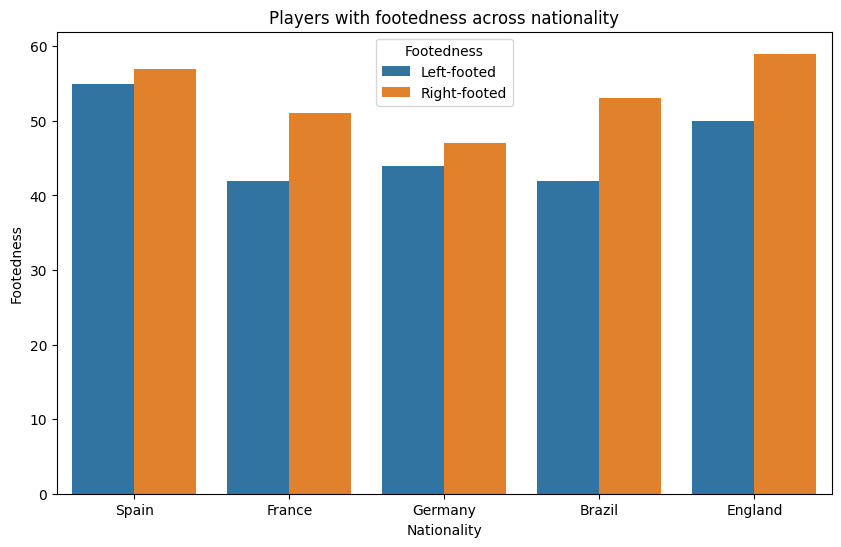

In [91]:
plt.figure(figsize=(10,6))
sns.countplot(x='Nationality', hue='Footedness', data=data)
plt.title('Players with footedness across nationality')
plt.xlabel('Nationality')
plt.ylabel('Footedness')
plt.show()

In [92]:
group_score=data.groupby('Nationality')['Goals Scored'].mean()
round(group_score,2)

Nationality
Brazil     15.32
England    13.90
France     14.41
Germany    14.35
Spain      14.69
Name: Goals Scored, dtype: float64

In [93]:
group_conv_rate=data.groupby('Footedness')['Conversion Rate'].mean()
round(group_conv_rate,3)

Footedness
Left-footed     0.198
Right-footed    0.201
Name: Conversion Rate, dtype: float64

In [94]:
#normality-1
stat, p_value=shapiro(data['Consistency'])
print('P Value:', p_value)

P Value: 0.45127699414580213


In [95]:
# filtering data
spain=data.query('Nationality=="Spain"')['Consistency']
france=data.query('Nationality=="France"')['Consistency']
brazil=data.query('Nationality=="Brazil"')['Consistency']
england=data.query('Nationality=="England"')['Consistency']
germany=data.query('Nationality=="Germany"')['Consistency']

In [96]:
# Levene test for statistics
stats, p_value=levene(spain, france, brazil, england, germany)
print("P Value:", p_value)

P Value: 0.8083990350934653


In [100]:
#one way anova
t_stat, p_value=stats.f_oneway(spain, france, brazil, england, germany)
print("P Value:", p_value)
# as the p_value is higher than 0.05 then there is no significant difference 

P Value: 0.19278675901599154


In [101]:
#normality test for hold up play
stat, p_value=shapiro(data['Hold-up Play'])
print("P Value:", p_value)

                      
                      

P Value: 0.15094090394128723


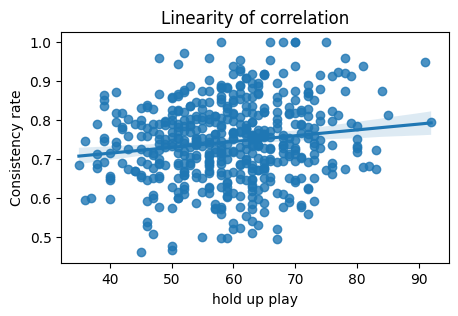

In [102]:
# linearity test between hold up play and consistency
plt.figure(figsize=(5,3))
sns.regplot(x='Hold-up Play', y='Consistency', data=data)
plt.title('Linearity of correlation')
plt.xlabel('hold up play')
plt.ylabel('Consistency rate')
plt.show()

In [103]:
# pearson correlation test
Hold_play=data['Hold-up Play']
Consistency=data['Consistency']

corr, p_value=pearsonr(Hold_play, Consistency)
print('Correlation:', corr)
print('P Value:', p_value)

#as the p_ value is lower than significance level then there is relationship between variables

Correlation: 0.14654573283554145
P Value: 0.0010146963053630409


In [104]:
# regression analysis OLS
x=data['Hold-up Play']
y=data['Consistency']

x_and_constant=sm.add_constant(x)
model=sm.OLS(y, x_and_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Sat, 12 Oct 2024   Prob (F-statistic):            0.00101
Time:                        15:50:48   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

In [105]:
#create a new feature 
data['Total contribution score']=data['Goals Scored']+data['Assists']+data['Shots on Target']+data['Dribbling Success']+data['Aerial Duels Won']+data['Defensive Contribution']+data['Big Game Performance']+data['Consistency']
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [106]:
# label encoder
encoder=LabelEncoder()
data['Footedness']=encoder.fit_transform(data['Footedness'])
data['Marital Status']=encoder.fit_transform(data['Marital Status'])
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [108]:
#create dummies for Nationality variables
dummies=pd.get_dummies(data[['Nationality']], dtype=int)
data=pd.concat([data, dummies], axis=1)
data=data.drop('Nationality', axis=1)
data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.820314,0.922727,8,11,113.577376,0,0,0,0,1
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.803321,0.678984,3,8,110.600139,0,0,1,0,0
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.766540,0.843858,8,9,94.433410,0,0,0,1,0
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.611798,0.662997,6,8,124.250575,0,0,1,0,0
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.701638,0.906538,8,6,107.293123,0,0,1,0,0


In [109]:
# cluster 
x=data.drop('Striker_ID', axis=1)

In [111]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss_score=kmeans.inertia_
    wcss.append(wcss_score)
    

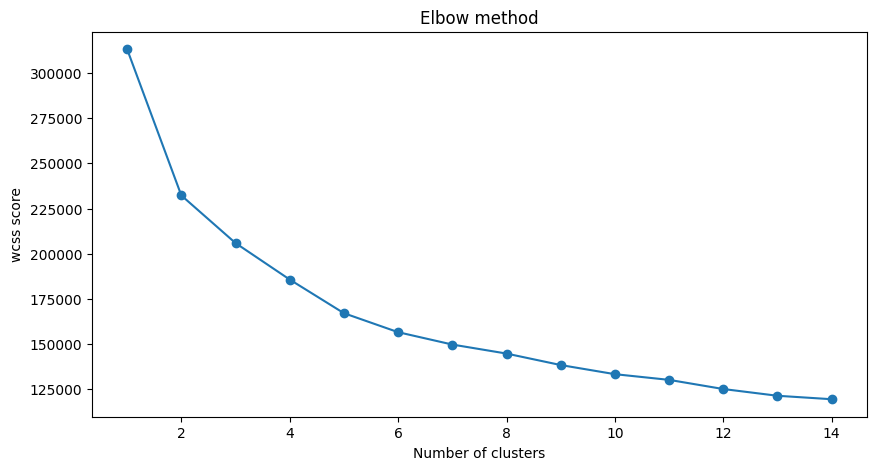

In [112]:
#elbow chart
plt.figure(figsize=(10,5))
plt.plot(range(1,15), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss score')
plt.show()

In [113]:
# adding labels 
kmeans=KMeans(n_clusters=2)
kmeans.fit(x)
labels=kmeans.labels_
data['Clusters']=labels
data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Clusters
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,0,0,0,0,1,1
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,0,0,1,0,0,1
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,0,0,0,1,0,1
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,0,0,1,0,0,0
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,0,0,1,0,0,1


In [115]:
round(data.groupby('Clusters')['Total contribution score'].mean(), 2)

Clusters
0    123.35
1    101.85
Name: Total contribution score, dtype: float64

In [116]:
mapping={0:'Best Strikers', 1:'Regular Strikers'}
data['Strikers types']=data['Clusters'].map(mapping)
data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Clusters,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,8,11,113.577376,0,0,0,0,1,1,Regular Strikers
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,3,8,110.600139,0,0,1,0,0,1,Regular Strikers
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,8,9,94.433410,0,0,0,1,0,1,Regular Strikers
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,6,8,124.250575,0,0,1,0,0,0,Best Strikers
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,8,6,107.293123,0,0,1,0,0,1,Regular Strikers


In [117]:
# drop clusters columnn
data=data.drop('Clusters', axis=1)
data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,0,0,0,0,1,Regular Strikers
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,0,0,1,0,0,Regular Strikers
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,0,0,0,1,0,Regular Strikers
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,0,0,1,0,0,Best Strikers
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,0,0,1,0,0,Regular Strikers


In [118]:
#pre processing of ml
mapping = {'Best Strikers':1, 'Regular Strikers': 0}
data['Strikers types'] = data['Strikers types'].map(mapping)
data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total contribution score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,0,0,0,0,1,0
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,0,0,1,0,0,0
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,0,0,0,1,0,0
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,0,0,1,0,0,1
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,0,0,1,0,0,0


In [154]:
# selecting the features 
x=data.drop(['Striker_ID', 'Strikers types'], axis=1)
y=data['Strikers types']


In [155]:
#scaling the features
scaler=StandardScaler()
Scaled_x=scaler.fit_transform(x)
Scaled_x

array([[-1.07047781, -1.03252879,  0.5050467 , ..., -0.47801802,
        -0.47169258,  1.86125917],
       [-1.07047781,  0.968496  , -0.10638998, ...,  2.09197134,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879,  0.70885893, ..., -0.47801802,
         2.12002488, -0.53727069],
       ...,
       [-1.07047781,  0.968496  , -0.10638998, ..., -0.47801802,
        -0.47169258, -0.53727069],
       [ 0.93416229,  0.968496  , -0.9216389 , ..., -0.47801802,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879, -1.32926335, ..., -0.47801802,
        -0.47169258, -0.53727069]])

In [156]:
y = [int(label) for label in y]

In [157]:
#Split into train test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(Scaled_x, y, test_size=0.2, random_state=42)

In [158]:
# logistic regression for stikertypes
model_lgr=LogisticRegression()
model_lgr.fit(x_train, y_train)

y_pred_lgr=model_lgr.predict(x_test)

Accuracy=accuracy_score(y_test, y_pred_lgr)
print( Accuracy*100,'%')


96.0 %


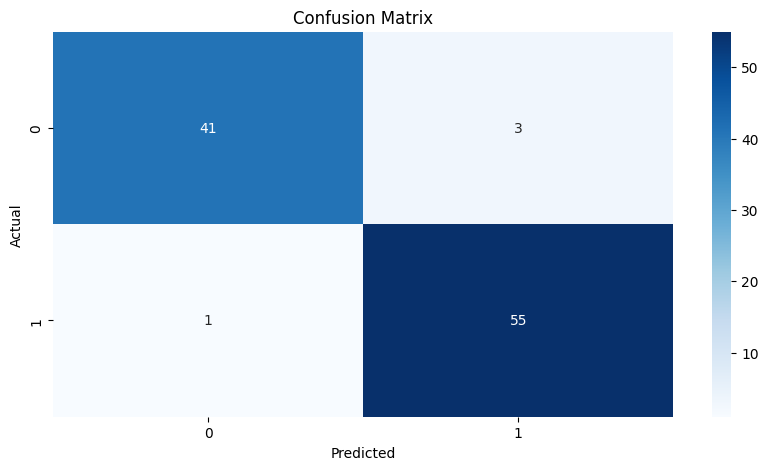

In [159]:
# confusion matrx
conf_matrix=confusion_matrix(y_test, y_pred_lgr)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()